In [1]:

import numpy as np
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, LeakyReLU
from keras.utils import np_utils
from keras import regularizers, models, layers
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [3]:
x_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,:1]

In [4]:
x_train = x_train/255
x_train = x_train.to_numpy().reshape(-1,28,28,1)

In [5]:
y_train = np_utils.to_categorical(y_train,10)  

In [6]:
test_data = test_data/255
test_data = test_data.to_numpy().reshape(-1,28,28,1)
print(x_train.shape)
print(y_train.shape)

(42000, 28, 28, 1)
(42000, 10)


In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.10, random_state=42 )

In [8]:
print(x_train.shape) 
print(x_val.shape)
print(y_train.shape) 
print(y_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


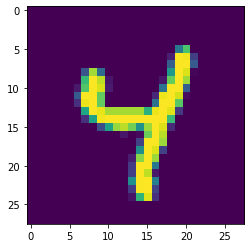

(28, 28)
4


In [9]:
a = np.array(x_train[1900], dtype='float').reshape((28,28))
plt.imshow(a)
plt.show()
print(a.shape)
print(numpy.argmax(y_train[1900], axis=0))

In [10]:
# model=models.Sequential([
                     
#                      #cnn
#                     layers.Conv2D(30,(3,3),activation="relu",input_shape=(28,28,1)),
#                     layers.MaxPooling2D((2,2)),
     
#                     layers.Conv2D(64,(3,3),activation="relu"),
#                     layers.MaxPooling2D((2,2)),
#                      #dense_layer
#                      layers.Flatten(),
#                      layers.Dense(64,activation="relu"),
#                      layers.Dense(10,activation="softmax")
# ]
# )

In [11]:
model = Sequential([
        # Layer 1
    Conv2D(filters = 32, kernel_size = 5, strides = 1, padding='same',activation = "relu", input_shape = (28,28,1), kernel_regularizer=regularizers.l2(0.0005)),# Layer 2
    Conv2D(filters = 32, kernel_size = 5, strides = 1, padding='same',use_bias=False),# Layer 3
    BatchNormalization(),# — — — — — — — — — — — — — — — — #
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2),
    Dropout(0.25),
    # — — — — — — — — — — — — — — — — ## Layer 3
    Conv2D(filters = 64, kernel_size = 3, strides = 1, padding='same',activation = "relu", kernel_regularizer=regularizers.l2(0.0005)),# Layer 4
    Conv2D(filters = 64, kernel_size = 3, strides = 1, padding='same',use_bias=False),# Layer 5
    BatchNormalization(),# — — — — — — — — — — — — — — — — #
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2),
    Dropout(0.25),
    Flatten(),
    # — — — — — — — — — — — — — — — — ## Layer 6
    Dense(units = 256, use_bias=False),# Layer 7
    BatchNormalization(),# — — — — — — — — — — — — — — — — #
    Activation("relu"),
    # — — — — — — — — — — — — — — — — ## Layer 8
    Dense(units = 128, use_bias=False),# Layer 9
    BatchNormalization(),# — — — — — — — — — — — — — — — — #
    Activation("relu"),
    # — — — — — — — — — — — — — — — — ## Layer 10
    Dense(units = 84, use_bias=False),# Layer 11
    BatchNormalization(),# — — — — — — — — — — — — — — — — #
    Activation("relu"),
    Dropout(0.25),
    # — — — — — — — — — — — — — — — — ## Output
Dense(units = 10, activation = "softmax")])

In [13]:
model.compile(
            optimizer = "adam",
            loss ="categorical_crossentropy",
            metrics =["accuracy"]

)

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=10)

Epoch 1/40
3780/3780 [==============================] - 201s 53ms/step - loss: 0.3167 - accuracy: 0.9131 - val_loss: 0.0974 - val_accuracy: 0.9762
Epoch 2/40
3780/3780 [==============================] - 201s 53ms/step - loss: 0.1634 - accuracy: 0.9579 - val_loss: 0.0885 - val_accuracy: 0.9771
Epoch 3/40
3780/3780 [==============================] - 192s 51ms/step - loss: 0.1252 - accuracy: 0.9689 - val_loss: 0.0650 - val_accuracy: 0.9886
Epoch 4/40
3780/3780 [==============================] - 208s 55ms/step - loss: 0.1079 - accuracy: 0.9748 - val_loss: 0.0564 - val_accuracy: 0.9900
Epoch 5/40
3780/3780 [==============================] - 178s 47ms/step - loss: 0.0934 - accuracy: 0.9774 - val_loss: 0.0465 - val_accuracy: 0.9910
Epoch 6/40
3780/3780 [==============================] - 178s 47ms/step - loss: 0.0897 - accuracy: 0.9786 - val_loss: 0.0508 - val_accuracy: 0.9886
Epoch 7/40
3780/3780 [==============================] - 181s 48ms/step - loss: 0.0821 - accuracy: 0.9820 - val_loss: 0

Accuracy: 99.3333


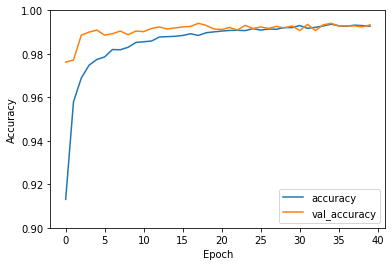

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=0)
print('Accuracy: %.4f' % (test_acc * 100.0))